# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

To proceed with this analysis, I would be answering some Questions which are:
 - Research Question 1: Overall Attendance Rate of the Appointments
 - Research Question 2: Proportion Of Gender Amongst Patients and their overall Attendance ratio
 - Research Question 3:  Trends in Number of Appointments
 - Research Question 4: Age Distribution of the Patients
 - Research Question 5: Appointments by Neighborhood
 - Research Question 6: Does Recieving SMS influence the Attendance Rate?
 - Research Question 7: The percentage of Attendance with respect to illness
 - Research Question 8: Summary Statistics on the Number of Appointment Days before the Scheduled Day

In [52]:
# to import the necessary packages needed in this analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the No Show Appointment dataset for analysis. 


### General Properties
To investigate the data and figure out the properties of this data

In [222]:
# Load the data and print out a few lines. 

# load the dataset by creating a function
def data(arg):
    df0 =pd.read_csv(arg)
    return df0

df = data('noshowappointments-kagglev2-may-2016.csv')


# take a glance at the first few rows of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Making Changes to the Column name and No show column

In [54]:
# to make changes to the column names

#to fix some spelling issues with the column names
df.rename(columns = {'No-show':'No_show', 'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)

#to make them lower case
df.columns = df.columns.str.lower()

#to confirm if all the changes were made
print(df.columns)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')


Taking a look at the no_show column

In [55]:
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

From the [documentation](https://www.kaggle.com/datasets/joniarroba/noshowappointments),
* **"Yes"** signifies that the patient did not show up
* **"No"** signifies that the patient showed up

In order to avoid confusion, I would rename them as:
* **"Yes"** to represent **"Absent"**
* **"No"** to represent **"Present"**

In [56]:
# to replace the values of ['No', 'Yes'] with ['Present', 'Absent']
df['no_show'] = df['no_show'].replace(['No','Yes'],['Present','Absent'])

#to comfirm if changes were made
df['no_show'].unique()

array(['Present', 'Absent'], dtype=object)

#### To check For the Presence of Null Values and Duplicates

In [57]:
# to check for duplicates in the data
df.duplicated().sum()

0

In [58]:
# to check for null values
df.columns[df.isnull().any()]

Index([], dtype='object')

>From the scripts written above, there are no Null or duplicate values

#### To check for Errors in DataTypes and Correct them

In [59]:
# to get some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hypertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handicap        110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


After taking a look at the information gotten from the table, there are columns with mismatched datatypes such as the "scheduledday" & "appointmentday" columns which were given a string(object) data type. This will have to be converted to datetime data type

In [60]:
# to change the datatypes of the "scheduledday" & "appointmentday" columns
df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"])

#to confirm if the changes were made
print(df["scheduledday"].dtypes)
print(df["appointmentday"].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]


#### The details of the table

In [61]:
# to find the shape of the table
df.shape

(110527, 14)

>*From this, it shows that the table has 110,527 rows of data (records) and 14 columns (field)* 

To check for the number of unique records

In [62]:
# for number of unique values
df.nunique()

patientid          62299
appointmentid     110527
gender                 2
scheduledday      103549
appointmentday        27
age                  104
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
no_show                2
dtype: int64

>*There are 62,299 unique patient IDs which means that some patients must have booked appointments pore than once. The Appointment IDs are all uniques values because it has similar length of rows as its unique values* 

I will not be using the ID columns for my analysis since I could use the number of rows as number of appointments bit I will store it in a new dataframe just in case I might need it

In [63]:
# to create a copy of the current dataset
df_copy = df.copy()
print(df_copy.head())

# to drop the ID columns 

df.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

      patientid  appointmentid gender              scheduledday  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             appointmentday  age      neighbourhood  scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   hypertension  diabetes  alcoholism  handicap  sms_received  no_show  
0             1         0           0         0             0  Present  
1             0         0           0     

In [64]:
#to check if the changes were made 
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

To check the summary statistics of the data

In [65]:
# for summary statistics
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Looking at the table, something seems off about the age. The minimum value is given as '-1'. 

In [66]:
# to look into this data
df[df['age'] == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,Present


Though the data seems real. The age does not seem possible. It could even be an entry error. I would drop this row of data and work with age column from 0 and above

In [67]:
# to drop the row
df = df[df['age'] != -1]

#to confirm if changes were made
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [68]:
df.shape

(110526, 12)

> After Cleaning the dataset, we are left with 110,526 rows of data and 12 columns

To show the distribution of the data

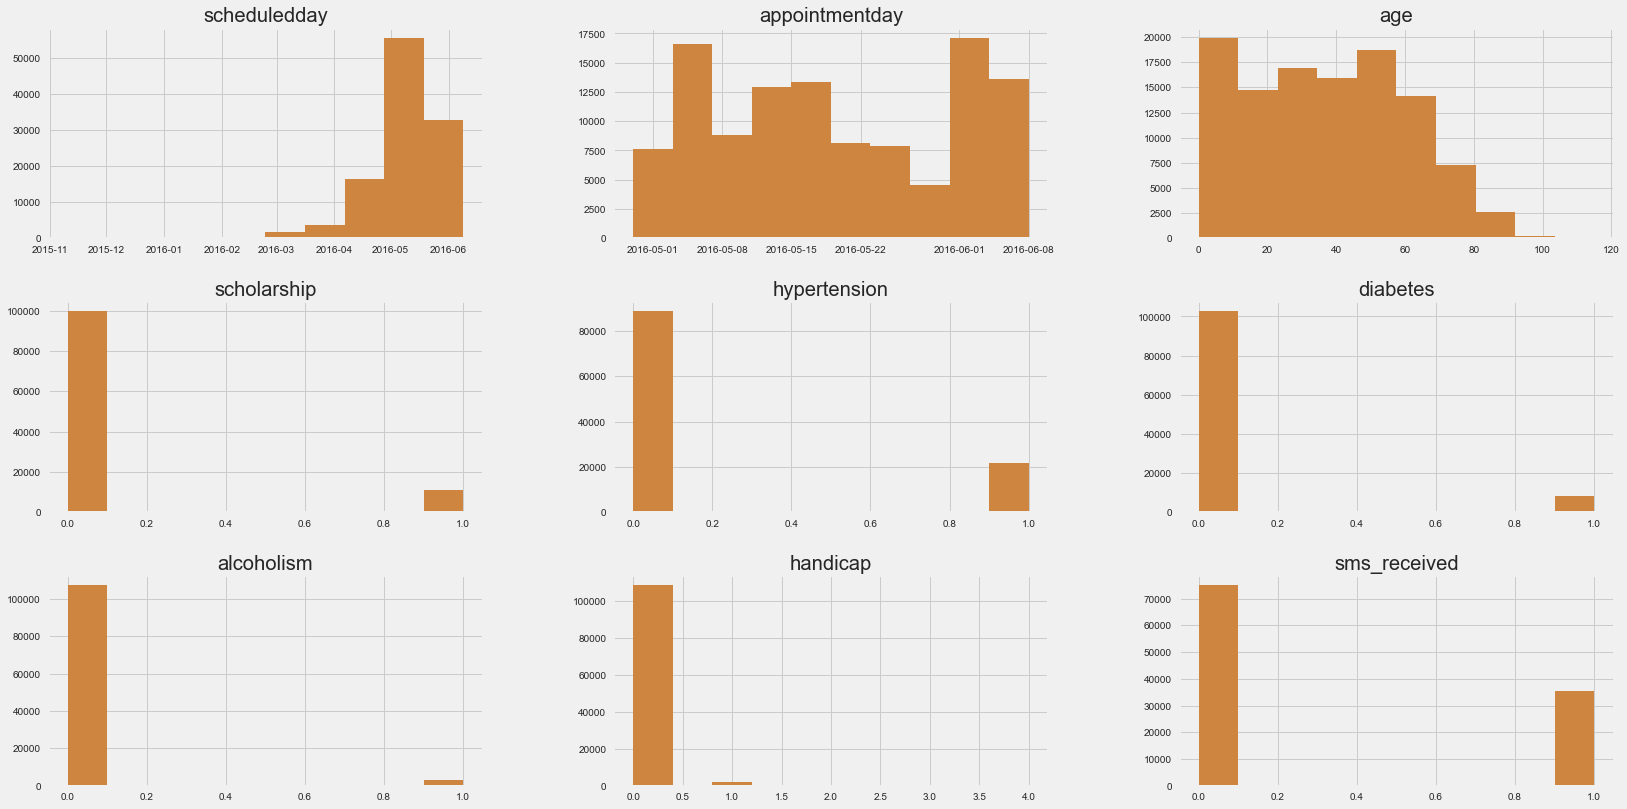

In [109]:
# to visualize the distribution of the data

df.hist(figsize = (25, 13), color = 'peru');

<a id='eda'></a>
## Exploratory Data Analysis

 Now that I have trimmed and cleaned the data, I am ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I posed in the Introduction section. I should compute the relevant statistics throughout the analysis when an inference is made about the data.

### Research Question 1: Overall Attendance Rate of the Appointments

To compute this, the "no_show" column would be investigated. We would be looking at the ratio of Present and Absent against the total number of appointments. A Pie Chart would be used to show this insight.

Present    88207
Absent     22319
Name: no_show, dtype: int64


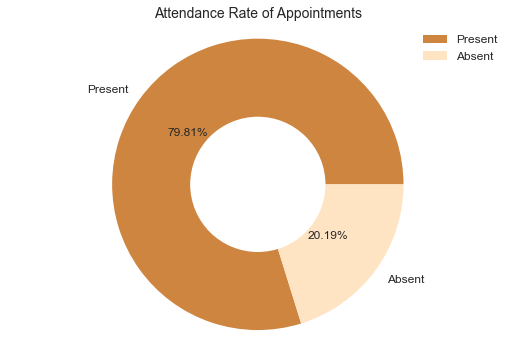

In [187]:
# to count the number of present and absent 
show = df['no_show'].value_counts()
print(show)

#to represent it in a pie plot
plt.style.use('seaborn')
plt.pie(show, labels = show.index, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Attendance Rate of Appointments', fontsize = 14 )
plt.legend(loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> From this insight generated, it shows that there is at least 20% chance that an appointment would be missed

### Research Question 2: Proportion Of Gender Amongst Patients and their overall Attendance ratio

We can recall that there are 62,299 unique patients that have appointments. I would represent the gender proportion using a pie chart. The DataFrame I would use for this analysis is the df_copy dataframe because it still contains the "patientid" column

In [116]:
# to first remove the age = -1
df_copy = df_copy[df_copy['age'] != -1]

# to do this, we have to drop the duplicates for the patientID to get the unique patients
uni_pat = df_copy.drop_duplicates(subset = 'patientid')

# to find the gender proportion of the patients
gen = uni_pat['gender'].value_counts()
print(gen)
gen_percent = round(gen/uni_pat.shape[0], 4)
print(gen_percent)

F    40045
M    22253
Name: gender, dtype: int64
F    0.6428
M    0.3572
Name: gender, dtype: float64


> *This shows that out of the 62,299 patients, 40,046( 64.28% ) of the patients are Female while the remaining 22,253( 35.72% ) are Male

This can be further represented on a doughnut chart

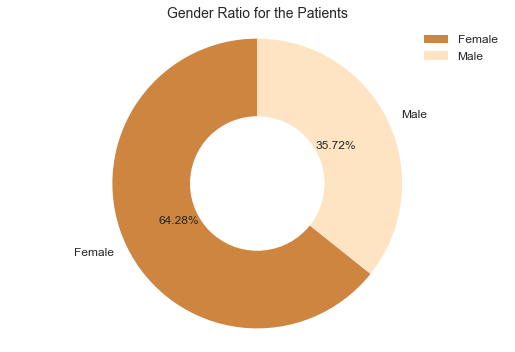

In [117]:
# to plot a doughnut chart
labels_pie = ["Female", "Male"]
plt.style.use('seaborn')
plt.pie(gen_percent, labels = labels_pie , radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12}, startangle = 90)
plt.axis('equal')
plt.title('Gender Ratio for the Patients', fontsize = 14 )
plt.legend(loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

I further want to show the proportion of patients who missed their appointments with respect to their gender. I would be using a stacked bar chart to represent this insight

no_show  Absent  Present
gender                  
F         14594    57245
M          7725    30962


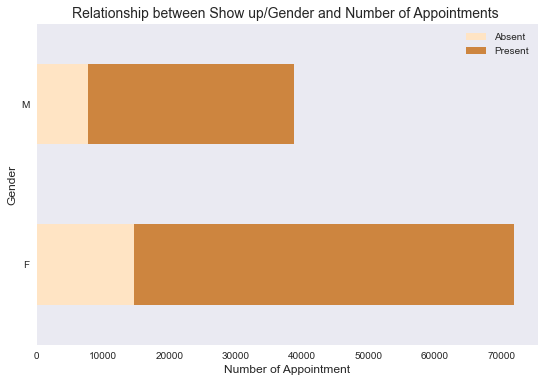

In [132]:
# to plot a stacked bar plot showing count of show_up vs gender
colors = ['bisque', 'peru']
pivot = df.pivot_table(columns = 'no_show', index = 'gender', aggfunc = 'size')
print(pivot)
pivot.plot.barh(stacked = True, color = colors)
plt.grid(False)
plt.legend(['Absent', 'Present'])
plt.ylabel('Gender', fontsize = 12)
plt.xlabel('Number of Appointment', fontsize = 12)
plt.title('Relationship between Show up/Gender and Number of Appointments ', fontsize = 14);


This wraps up the Proportion Of Gender Amongst Patients and their overall Attendance ratio

### Research Question 3:  Trends in Number of Appointments

I want to investigate the number of appointments across the appointment days. A line chart would be best suitable to represent this insight

In [214]:
# to count the number of Appointments per day
line = df['scheduledday'].value_counts().sort_index()
line_sort = line.sort_values(ascending = False)
print(line_sort)
# to find the mean appointments booked per day
print(line.mean())

2016-05-06 07:09:54+00:00    24
2016-05-06 07:09:53+00:00    23
2016-04-25 17:17:46+00:00    22
2016-04-25 17:18:27+00:00    22
2016-04-25 17:17:23+00:00    19
                             ..
2016-05-03 16:11:42+00:00     1
2016-05-03 16:11:32+00:00     1
2016-05-03 16:11:10+00:00     1
2016-05-03 16:10:53+00:00     1
2016-06-08 20:07:23+00:00     1
Name: scheduledday, Length: 103548, dtype: int64
1.0673890369683625


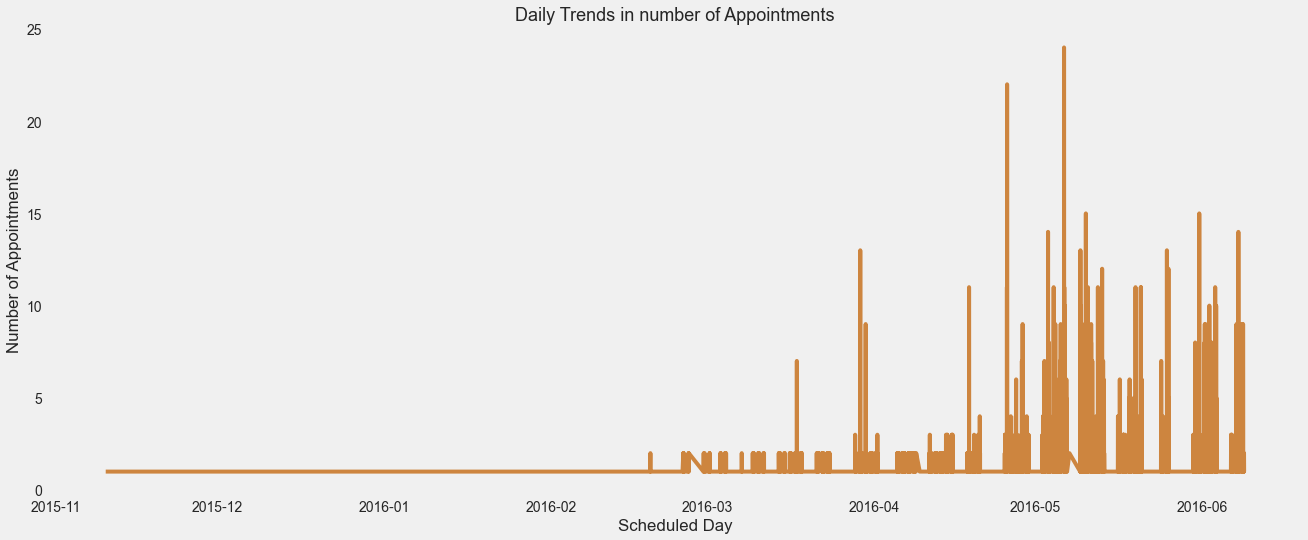

In [218]:
# to plot the line plot to show trends
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20, 8))
plt.plot(line, color = 'peru')
plt.title('Daily Trends in number of Appointments', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Scheduled Day')
plt.ylabel('Number of Appointments')
plt.grid(False)
plt.show()

Using the 'ScheduledDay' column, it is possible to extract the days which could be used to know the working days when patients can come for appointment 

In [97]:
# to look at the structure of the table
df.head(4)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present


In [211]:
# to extract the day of the appointmentday column
df['appointment_dayname'] = df['scheduledday'].dt.day_name()

#to get the working days for appointments 
df['appointment_dayname'].unique()

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

> *From the table and array above, We could say that appointment days are Mondays, Tuesdays, Wednesdays, Thursdays, Fridays and Saturdays. Sundays are not included in the Appointment days*

Further analysis can be done using the appointment_dayname column to find out the number of appointments that has happened each day of the week. We can use this to know the busiest days or the most used day for appointments then visualize it using a bar chart.

no_show              Absent  Present  total  Present_ratio  Absent_ratio
appointment_dayname                                                     
Tuesday                5291    20877  26168       0.797806      0.202194
Wednesday              4879    19383  24262       0.798904      0.201096
Monday                 4561    18523  23084       0.802417      0.197583
Friday                 3887    15028  18915       0.794502      0.205498
Thursday               3700    14373  18073       0.795275      0.204725
Saturday                  1       23     24       0.958333      0.041667


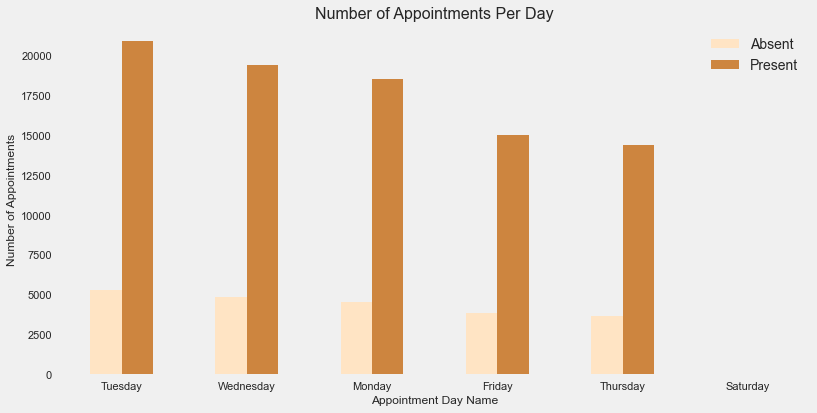

In [212]:
# to create a pivot table showing the total number of appointments on a certain day
pivot_day = df.pivot_table(index = 'appointment_dayname', columns = 'no_show', aggfunc = 'size')\
                            .sort_values('Present', ascending = False)
pivot_day_total = pivot_day.copy() # to make a copy of the pivot table
pivot_day_total['total'] = pivot_day_total['Absent'] + pivot_day_total['Present']
pivot_day_total['Present_ratio'] = pivot_day_total['Present'] / pivot_day_total['total']
pivot_day_total['Absent_ratio'] = pivot_day_total['Absent'] / pivot_day_total['total']
print(pivot_day_total)


# to visualize the pivot table using a bar chart
colors = ['bisque', 'peru']
pivot_day.plot.bar(color = colors, figsize = (12, 6))
plt.grid(False)
plt.ylabel('Number of Appointments', fontsize = 12)
plt.xlabel('Appointment Day Name', fontsize = 12)
plt.xticks(rotation = 0, fontsize = 11)
plt.yticks(fontsize = 11)
plt.title('Number of Appointments Per Day', fontsize = 16)
plt.legend(['Absent', 'Present'], loc = 'upper right', fontsize = 14)
plt.show();

> *From the chart, we can dedcue that Tuesdays and Wednesdays are the days with the highest appointments. Tuesdays having the most then for weekdays, thursdays have the least appointments on Weekdays. I recommend more appointments be scheduled for thursdays because it also has a low absent ratio.*  
>
> *Looking at the pivot table and chart above, I can deduce that Saturdays are not appointment days but could probably be used in cases of Emergency but this is a theory.* 

### Research Question 4: Age Distribution of the Patients

To get the age range of the patients, the age would be grouped and an analysis would be done to find the number of patients we have in that group. This would be done using the df_copy dataframe

In [119]:
# to recall the df_copy table
df_copy.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Present


In [120]:
# to do this analysis, we have to drop the duplicates for the patientID to get the unique patients
uni_pat = df_copy.drop_duplicates(subset = 'patientid')
uni_pat.shape

(62298, 14)

To show the distribution of the age of the patients can be displayed using a histogram

The minimum age of the patients is 0 years
The maximum age of the patients is 115 years


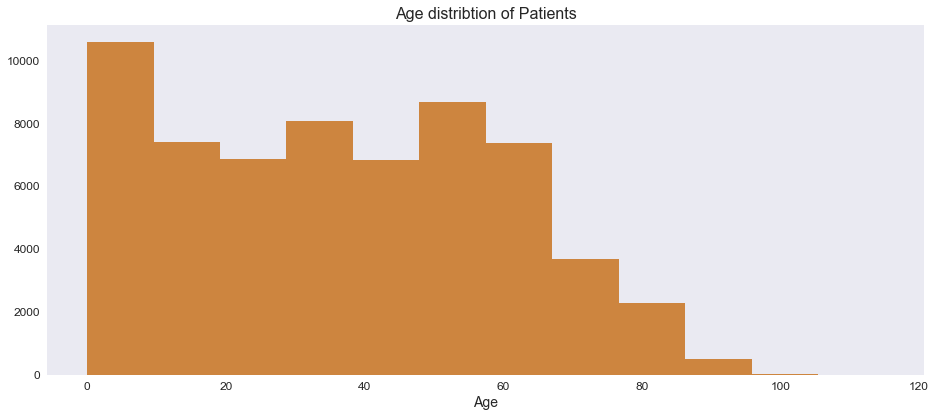

In [122]:
# to get the minimum and maximum age of patients
min_age = uni_pat['age'].min()
max_age = uni_pat['age'].max()
print(f'The minimum age of the patients is {min_age} years')
print(f'The maximum age of the patients is {max_age} years')

# to plot the age distribution
uni_pat['age'].hist(bins = 12, figsize = (14, 6), color = 'peru')
plt.xlabel('Age', fontsize = 14)
plt.title('Age distribtion of Patients', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.grid(False)
plt.show();

> *The Histogram shows that majority of our patients are within the age of 0 - 10 years followed by 50 - 60 years and then 30 - 40 years*

Next is to look at the rate at which each set of age show up for appointments

In [199]:
# to bin to the ages to groups
names = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81 -90', '91-100', '100- 115']
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 115]

# to create the bins and add to the df table
df['age_bins'] = pd.cut(df.age, bins, labels = names)

# to check if the changes were made
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dayname,age_bins,handicapped
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,Friday,61-70,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,Friday,51-60,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present,Friday,61-70,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,Friday,0-10,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,Friday,51-60,False


To create a pivot table showing the age bins of the patient as well as their attendance ratio. With this we can be able to predict the attendance of a certain age of patient

In [200]:
# to create a pivot table showing the total number of appointments on a certain day
pivot_age = df.pivot_table(index = 'age_bins', columns = 'no_show', aggfunc = 'size')\
                            .sort_values('Present', ascending = False)
pivot_age['total'] = pivot_age_total['Absent'] + pivot_age_total['Present']
print(pivot_age.sort_values('total', ascending = False))

no_show   Absent  Present  total
age_bins                        
51-60       2721    12940  15661
0-10        3788    14961  15210
31-40       3232    11820  15052
41-50       2870    11550  14420
21-30       3394    10389  13783
11-20       3308     9791  13099
61-70       1648     9541  11189
71-80        889     4832   5721
81 -90       407     2137   2544
91-100        59      242    301
100- 115       3        4      7


> *The pivot table above shows that majority of the Appointments were for patients between the age of 51 - 60.*

To plot a chart to represent the Present ratio and absent ratio. This can be used to derive the percentage at which a patient from a certain age will attend their appointment

no_show   Present_ratio  Absent_ratio
age_bins                             
0-10           0.983629      0.249047
61-70          0.852712      0.147288
71-80          0.844608      0.155392
81 -90         0.840016      0.159984
51-60          0.826256      0.173744
91-100         0.803987      0.196013
41-50          0.800971      0.199029
31-40          0.785278      0.214722
21-30          0.753755      0.246245
11-20          0.747462      0.252538
100- 115       0.571429      0.428571


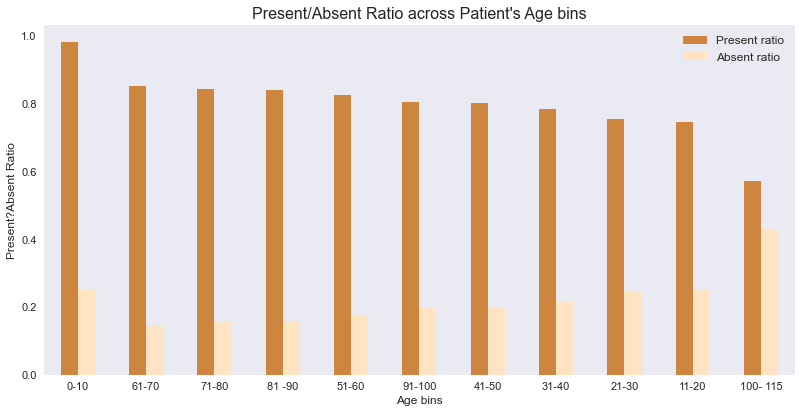

In [201]:
# to get the ratio of attendance for the age groups
pivot_age['Present_ratio'] = pivot_age['Present'] / pivot_age['total']
pivot_age['Absent_ratio'] = pivot_age['Absent'] / pivot_age['total']
pivot_age_ratio = pivot_age[['Present_ratio', 'Absent_ratio']].sort_values('Present_ratio', ascending = False)
print(pivot_age_ratio)


#to plot the chart of the pivot_age_total dataframe
colors = ['peru', 'bisque']
plt.style.use('seaborn')
pivot_age_ratio.plot(kind = 'bar', figsize = (12, 6), color = colors)
plt.grid(False)
plt.ylabel('Present?Absent Ratio', fontsize = 12)
plt.xlabel('Age bins', fontsize = 12)
plt.xticks(rotation = 0, fontsize = 11)
plt.yticks(fontsize = 11)
plt.title("Present/Absent Ratio across Patient's Age bins", fontsize = 16)
plt.legend(['Present ratio', 'Absent ratio'], loc = 'upper right', fontsize = 12)
plt.show();

> *Based on attendance rate, patients within the age of 0 - 10 have the most likely chance to show up for appointments.*

### Research Question 5: Appointments by Neighborhood

The Neighborhood column signify the neighborhood where the appointment takes place in brazil. Let us find out how many neighborhoods where used as locations.

In [139]:
df.neighbourhood.nunique()

81

I would carry out an analysis to show the neighbourhood with the highest number of appointments and the neighbourhoods with the least number of appointments. Then they would be represented in a bar plot 

ITARARÉ            3514
JARDIM DA PENHA    3877
RESISTÊNCIA        4431
MARIA ORTIZ        5805
JARDIM CAMBURI     7717
Name: neighbourhood, dtype: int64


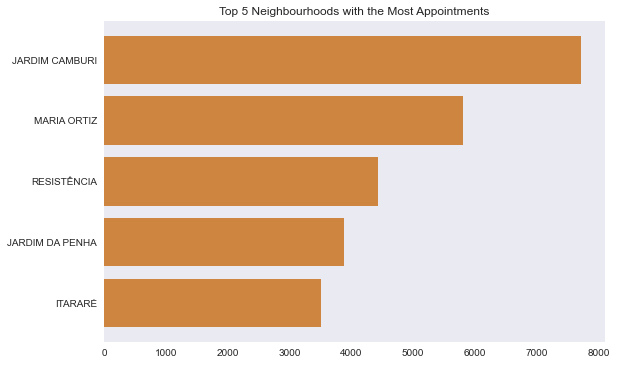

In [145]:
# for neighbourhoods with the highest appointments
nhood = df.neighbourhood.value_counts(sort = True)
top_nhood = nhood.head(5).sort_values()
print(top_nhood)

plt.barh(top_nhood.index, top_nhood, color = 'peru')
plt.title('Top 5 Neighbourhoods with the Most Appointments')
plt.grid(False)
plt.show()

PARQUE INDUSTRIAL               1
ILHAS OCEÂNICAS DE TRINDADE     2
AEROPORTO                       8
ILHA DO FRADE                  10
ILHA DO BOI                    35
Name: neighbourhood, dtype: int64


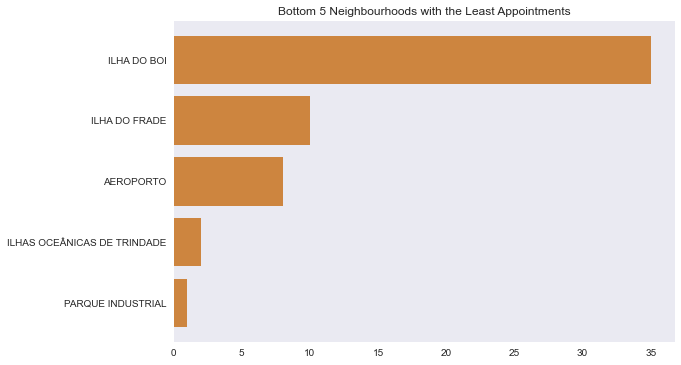

In [146]:
#for neighbourhoods with the least appointments
bot_nhood = nhood.tail(5).sort_values()
print(bot_nhood)


plt.barh(bot_nhood.index, bot_nhood, color = 'peru')
plt.title('Bottom 5 Neighbourhoods with the Least Appointments')
plt.grid(False)
plt.show()

> *From the analysis above, The neighbourhood with the highest appointments are 'ITARARÉ', 'JARDIM DA PENHA', 'RESISTÊNCIA', 'MARIA ORTIZ' and 'JARDIM CAMBURI' while the neighbourhood with the least number of appointments are 'PARQUE INDUSTRIAL', 'ILHAS OCEÂNICAS DE TRINDADE', 'AEROPORTO', 'ILHA DO FRADE' and 'ILHA DO BOI'.*

### Research Question 6: Does Recieving SMS influence the Attendance Rate?

To be able to predict this relationship, the table showed be observed the attendance rate when the sms was recieved and observe the attendance rate when SMS was recieved.

Before I go into that analysis, I would like to know the rate at which sms is sent for an appointment

0    75044
1    35482
Name: sms_received, dtype: int64


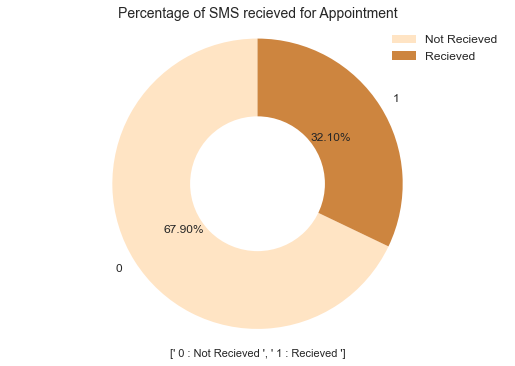

In [186]:
# to check the ratio of sms sent 
sms = df.sms_received.value_counts()
print(sms)

plt.style.use('seaborn')
plt.pie(sms, labels = sms.index, radius = 1.4, autopct = '%0.2f%%', colors = ['bisque', 'peru'], 
        textprops = {'fontsize' : 12}, startangle = 90)
plt.xlabel([' 0 : Not Recieved ', ' 1 : Recieved '])
plt.axis('equal')
plt.title('Percentage of SMS recieved for Appointment', fontsize = 14 )
plt.legend(['Not Recieved', 'Recieved'], loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *This shows that only 32.10% of the appointments received an SMS while the remaining 67.90% did not get an SMS.*

Before any conclusion is made, further analysis would be done to see if their is a correlation between SMS recieved and rate of Attendance

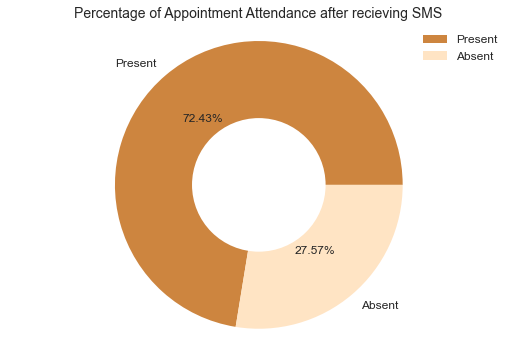

In [185]:
# to determine the percentage of attendance after recieving SMS
sms_yes = df.query('sms_received == 1')
sum_yes_count = sms_yes['no_show'].value_counts()

plt.style.use('seaborn')
plt.pie(sum_yes_count, labels = sum_yes_count.index, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Percentage of Appointment Attendance after recieving SMS', fontsize = 14 )
plt.legend(['Present', 'Absent'], loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

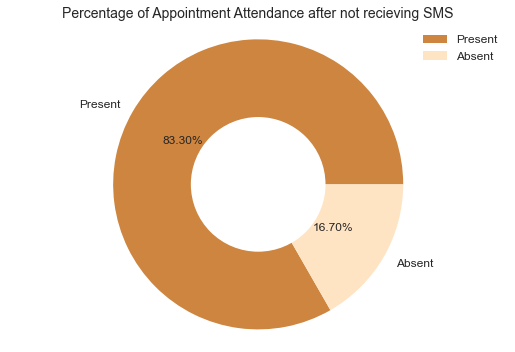

In [184]:
# to determine the percentage of attendance after not recieving SMS
sms_no = df.query('sms_received == 0')
sum_no_count = sms_no['no_show'].value_counts()

plt.style.use('seaborn')
plt.pie(sum_no_count, labels = sum_yes_count.index, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Percentage of Appointment Attendance after not recieving SMS', fontsize = 14 )
plt.legend(['Present', 'Absent'], loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *From the chart above, There is a 72.43% attendance after recieving SMS and there is an 83.30% attendance after SMS was not recieved.*
>
> *From this analysis above, we can deduce that the SMS recieved does not influence the Attendance rate.*  

### Research Question 7: The percentage of Attendance with respect to illness

To begin this analysis, I would like to first check the percentage of the Appointments that belong to a certain illness and then further analysis would be done to check the Attendance rate for patients with a certain illness

To view the dataframe:

In [158]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dayname,age_bins
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present,Friday,61-70
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,Friday,51-60
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present,Friday,61-70
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,Friday,0-10
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Present,Friday,51-60


From the dataframe, the illnesses are hypertension, diabetes, alcoholism and Handicap

#### For Hypertension

0    88725
1    21801
Name: hypertension, dtype: int64


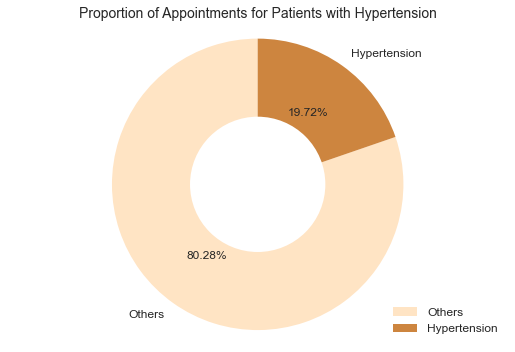

In [171]:
# to know the number of appointments for patients with Hypertension
hyper_count = df.hypertension.value_counts()
print(hyper_count)

plt.style.use('seaborn')
labels_pie = ["Others", "Hypertension"]
plt.pie(hyper_count, labels = labels_pie, radius = 1.4, autopct = '%0.2f%%', colors = ['bisque', 'peru'], textprops = {'fontsize' : 12}, startangle = 90)
plt.axis('equal')
plt.title('Proportion of Appointments for Patients with Hypertension', fontsize = 14 )
plt.legend(loc = 'lower right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *From the chart above, 19.72% of the scheduled appointments are for patients with Hypertension.*


To check the attendance rate of the patients that have Hypertension

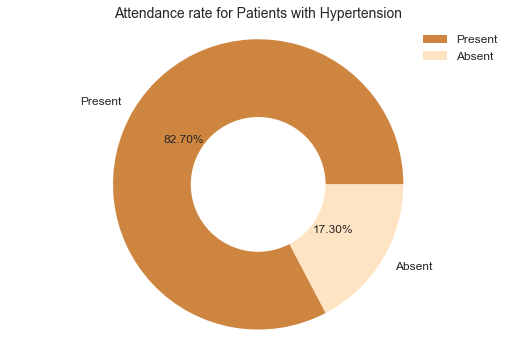

In [183]:
hyper = df[df['hypertension'] == 1]

hyper_attend = hyper['no_show'].value_counts()

plt.style.use('seaborn')
plt.pie(hyper_attend, labels = hyper_attend.index, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Attendance rate for Patients with Hypertension', fontsize = 14 )
plt.legend(['Present', 'Absent'], loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *By investigating further to investigate the attendance rate of the patients with Hypertension, I figured out that they have an attendance rate of 82.70%.*  

#### For Diabetes

0    102583
1      7943
Name: diabetes, dtype: int64


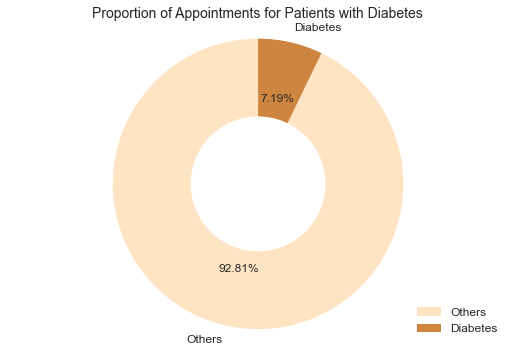

In [172]:
# to know the number of appointments for patients with Diabetes
diab_count = df.diabetes.value_counts()
print(diab_count)

plt.style.use('seaborn')
labels_pie = ["Others", "Diabetes"]
plt.pie(diab_count, labels = labels_pie, radius = 1.4, autopct = '%0.2f%%', colors = ['bisque', 'peru'], textprops = {'fontsize' : 12}, startangle = 90)
plt.axis('equal')
plt.title('Proportion of Appointments for Patients with Diabetes', fontsize = 14 )
plt.legend(loc = 'lower right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *From the chart above, 7.19% of the scheduled appointments are for patients with Diabetes.*


To check the attendance rate of the patients that have Diabetes

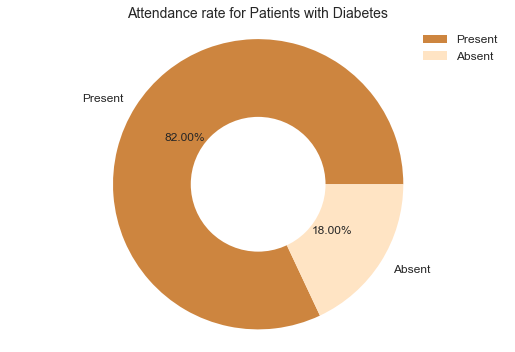

In [182]:
diab = df[df['diabetes'] == 1]

diab_attend = diab['no_show'].value_counts()

plt.style.use('seaborn')
plt.pie(diab_attend, labels = diab_attend.index, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Attendance rate for Patients with Diabetes', fontsize = 14 )
plt.legend(['Present', 'Absent'], loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *By investigating further to investigate the attendance rate of the patients with Diabetes, I figured out that they have an attendance rate of 82.00%.*  

#### For Alcoholism

0    107166
1      3360
Name: alcoholism, dtype: int64


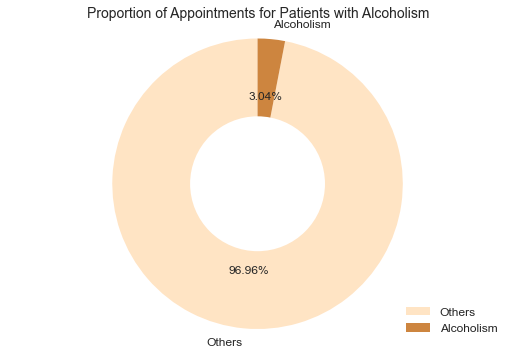

In [173]:
# to know the number of appointments for patients with alcoholism
alc_count = df.alcoholism.value_counts()
print(alc_count)

plt.style.use('seaborn')
labels_pie = ["Others", "Alcoholism"]
plt.pie(alc_count, labels = labels_pie, radius = 1.4, autopct = '%0.2f%%', colors = ['bisque', 'peru'], textprops = {'fontsize' : 12}, startangle = 90)
plt.axis('equal')
plt.title('Proportion of Appointments for Patients with Alcoholism', fontsize = 14 )
plt.legend(loc = 'lower right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *From the chart above, 7.19% of the scheduled appointments are for patients with Alcoholism.*


To check the attendance rate of the patients that have Alcoholism

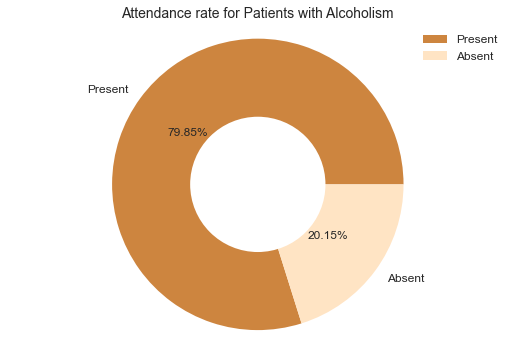

In [181]:
alc = df[df['alcoholism'] == 1]

alc_attend = alc['no_show'].value_counts()

plt.style.use('seaborn')
plt.pie(alc_attend, labels = alc_attend.index, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Attendance rate for Patients with Alcoholism', fontsize = 14 )
plt.legend(['Present', 'Absent'], loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *By investigating further to investigate the attendance rate of the patients with Diabetes, I figured out that they have an attendance rate of 79.85%.*  

#### For Handicap

Unlike the other columns for illness, the handicap column has extra set of values. Let us take a look at the Handicap column

In [176]:
# to list the unique values of the handicap column
df.handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

From the [documentation](https://www.kaggle.com/datasets/joniarroba/noshowappointments), It is stated that the Handicap column is either True or False whereas the column consist of 0, 1, 2, 3 & 4. THIS IS A LIMITATION!!

I would classify this column into two namely:
- "False" to represent 0
- "True" to represent 1, 2, 3 & 4

I would be introducing a new column called Handicapped with values True and False to signify if the Patient has Handicap or not

In [177]:
# to create bins for the grouping
bins = [-1, 0, 4]
label_name = ['False', 'True']
df['handicapped'] = pd.cut(df.handicap, bins, labels = label_name)

# to confirm the values in this column
df['handicapped'].unique()

['False', 'True']
Categories (2, object): ['False' < 'True']

To check further if the changes were made

In [179]:
# this will print the unique values of handicapped column at a certain value of the handicap column

# when handicap == 0 
print(df['handicapped'][df.handicap ==0].unique())
# when handicap == 1
print(df['handicapped'][df.handicap ==1].unique())
# when handicap == 2
print(df['handicapped'][df.handicap ==2].unique())
# when handicap == 3
print(df['handicapped'][df.handicap ==3].unique())
# when handicap == 4
print(df['handicapped'][df.handicap ==4].unique())

['False']
Categories (2, object): ['False' < 'True']
['True']
Categories (2, object): ['False' < 'True']
['True']
Categories (2, object): ['False' < 'True']
['True']
Categories (2, object): ['False' < 'True']
['True']
Categories (2, object): ['False' < 'True']


To further my analysis

False    108285
True       2241
Name: handicapped, dtype: int64


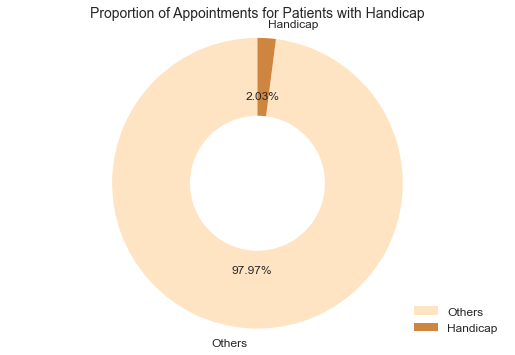

In [189]:
# to know the number of appointments for patients with alcoholism
hand_count = df.handicapped.value_counts()
print(hand_count)

plt.style.use('seaborn')
labels_pie = ["Others", "Handicap"]
plt.pie(hand_count, labels = labels_pie, radius = 1.4, autopct = '%0.2f%%', colors = ['bisque', 'peru'], textprops = {'fontsize' : 12}, startangle = 90)
plt.axis('equal')
plt.title('Proportion of Appointments for Patients with Handicap', fontsize = 14 )
plt.legend(loc = 'lower right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *From the chart above, 2.03% of the scheduled appointments are for patients with Handicap.*


To check the attendance rate of the patients that have Handicap

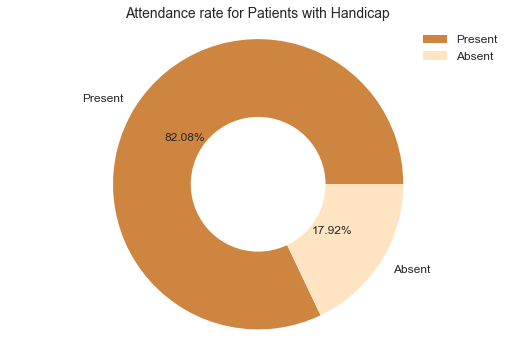

In [190]:
hand = df[df['handicap'] == 1]

hand_attend = hand['no_show'].value_counts()

plt.style.use('seaborn')
plt.pie(hand_attend, labels = hand_attend.index, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], 
        textprops = {'fontsize' : 12})
plt.axis('equal')
plt.title('Attendance rate for Patients with Handicap', fontsize = 14 )
plt.legend(['Present', 'Absent'], loc = 'upper right', fontsize = 12)

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *By investigating further to investigate the attendance rate of the patients with Handicap, I figured out that they have an attendance rate of 82.08%.*  

Analysis has been done for each illness, investigating the percentage of appointments for a certain illness as well as the rate at which the patient with a certain illness attend their appointment. 

It is observed that the percentage of appointment for a certain illness is really low, the higest being 19.72% which are for patients with Hypertension. It could be that patients with other forms of illnesses come for appointment then maybe the illness was not recorded. 

The next analysis would be to check the percentage of appointments scheduled for any reasons other than Hypertension, Diabetes, Alcoholism and Handicap

In [203]:
# to select rows for appointments neither for Hypertension, Diabetes, Alcoholism nor Handicap
hypertension = df[df.hypertension == 0]
diabetes = hypertension[df.diabetes == 0]
alcoholism = diabetes[df.alcoholism == 0]
none = alcoholism[df.handicap == 0]

none.head()

C:\Users\lewis\AppData\Local\Temp/ipykernel_5476/567389899.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes = hypertension[df.diabetes == 0]
C:\Users\lewis\AppData\Local\Temp/ipykernel_5476/567389899.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alcoholism = diabetes[df.alcoholism == 0]
C:\Users\lewis\AppData\Local\Temp/ipykernel_5476/567389899.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  none = alcoholism[df.handicap == 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_dayname,age_bins,handicapped
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present,Friday,51-60,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present,Friday,61-70,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present,Friday,0-10,False
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Absent,Friday,21-30,False
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Absent,Friday,31-40,False


Further analysis would be done to know the number of appointments for neither of the illness stated above as compared to the total appointments in record

In [204]:
# getting the number of patients with either or more of the illness
ill = df.shape[0] - none.shape[0]
others = none.shape[0]

# to convert to a numpy array
patients = np.array([ill, others])

patients

array([26412, 84114])

To visualize the proportion of appointments using a pie chart

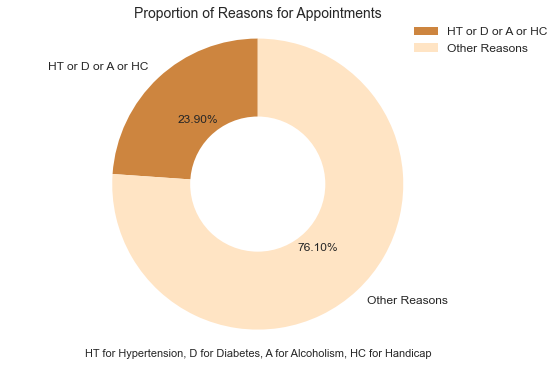

In [205]:
plt.style.use('seaborn')
labels_pie = ["HT or D or A or HC", "Other Reasons"]
plt.pie(patients, labels = labels_pie, radius = 1.4, autopct = '%0.2f%%', colors = ['peru', 'bisque'], textprops = {'fontsize' : 12}, startangle = 90)
plt.axis('equal')
plt.title('Proportion of Reasons for Appointments', fontsize = 14 )
plt.legend(loc = 'upper right', bbox_to_anchor=(1.1,1.025), fontsize = 12)
plt.xlabel('HT for Hypertension, D for Diabetes, A for Alcoholism, HC for Handicap')

circle = plt.Circle(xy=(0,0), radius = 0.65, facecolor = 'white')
plt.gca().add_artist(circle)
plt.show()

> *From the chart, 76.10% of the patients had appointments for other reasons not stated in the no show data. SInce this wasnt stated in other to gain more clarity then the data could  be incomplete.*

### Research Question 8: Summary Statistics on the Number of Appointment Days before the Scheduled Day


From the  [documentation](https://www.kaggle.com/datasets/joniarroba/noshowappointments), 

- Scheduled Day: The day of the actuall appointment, when they have to visit the doctor.
- Appointment Day: The day someone called or registered the appointment, this is before appointment of course

To get the number of days before scheduled day, A difference would be taken between Scheduled days and Appointment days using 
```
number of appointment days before scheduled days = scheduled day - appointment day
```

In [215]:
df['day_diff'] = (df['scheduledday'] - df['appointmentday']).dt.days

df.day_diff.unique()

array([   0,   -2,   -3,   -1,   -4,   -9,  -29,  -10,  -23,  -11,  -18,
        -17,  -14,  -28,  -24,  -21,  -15,  -16,  -22,  -43,  -30,  -31,
        -42,  -32,  -56,  -45,  -46,  -39,  -37,  -38,  -44,  -50,  -60,
        -52,  -53,  -65,  -67,  -91,  -66,  -84,  -78,  -87, -115, -109,
        -63,  -70,  -72,  -57,  -58,  -51,  -59,  -41,  -49,  -73,  -64,
        -20,  -33,  -34,   -6,  -35,  -36,  -12,  -13,  -40,  -47,   -8,
         -5,   -7,  -25,  -26,  -48,  -27,  -19,  -61,  -55,  -62, -176,
        -54,  -77,  -69,  -83,  -76,  -89,  -81, -103,  -79,  -68,  -75,
        -85, -112,    1,  -80,  -86,  -98,  -94, -142, -155, -162, -169,
       -104, -133, -125,  -96,  -88,  -90, -151, -126, -127, -111, -119,
        -74,  -71,  -82, -108, -110, -102, -122, -101, -105,  -92,  -97,
        -93, -107,  -95,    6, -139, -132, -179, -117, -146, -123],
      dtype=int64)

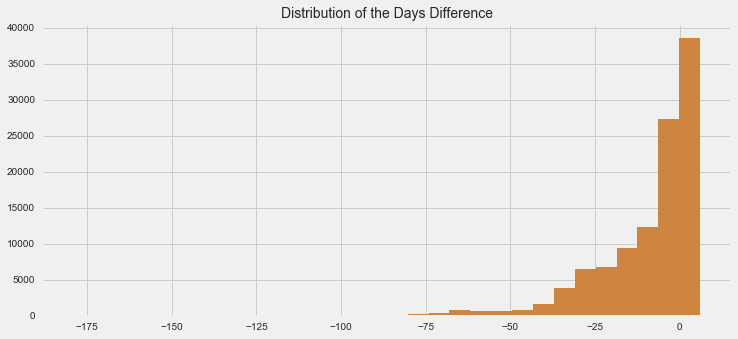

In [220]:
df.day_diff.hist(bins = 30, figsize = (11, 5), color = 'peru')
plt.title('Distribution of the Days Difference', fontsize = 14);

Looking at the chart and the unique values of the day difference, there are a lot of negative values. This is one of the limitations of the dataset. This means that the scheduled day for the appointment had been done then an appointment date was registered after the scheduled day.

To compute the summary statistics for the day difference:

In [217]:
df.day_diff.describe()

count    110526.000000
mean        -10.183794
std          15.255034
min        -179.000000
25%         -15.000000
50%          -4.000000
75%           0.000000
max           6.000000
Name: day_diff, dtype: float64

<a id='conclusions'></a>
## Conclusions

> There are 110,527 appointments while there are 62,299 patients. There are most likely patients with more than one appointments.

>The attendance rate of the patients are relatively high. On checking within the age distribution, ages 0 – 10 years have the highest attendance rate.

>I see no relationship between the SMS received and the attendance rate of the patient. More details in the report

>Over 70% of the patients do not have their illness accounted for

>Appointment days to see the doctor are majorly from Mondays to Fridays. Tuesdays having the most appointments so far. Saturdays were seldomly used. I presume that those are emergency situations. No appointment was done on a Sunday.

>The neighborhood with the highest appointments are 'itararé', 'Jardim Da Penha', 'Resistência', 'Maria Ortiz' and 'Jardim Camburi' while the neighborhood with the least number of appointments are 'Parque Industrial', 'Ilhas Oceânicas De Trindade', 'Aeroporto', 'Ilha Do Frade' and 'Ilha Do Boi'

>On 6th of June, 2016, the highest number of appointment was recorded


### Limitations

>Misconception with the no-show columns. Rumor has it that No meant the patient did not attend appointment while yes meant the patient attended the appointment but the documentation stated otherwise.

>The scheduled day is meant to come after the appointment day but the day difference were giving negative values which is not supposed to be so

>The dataset appeared to have a negative age which cannot be so

>76.10% of the patients do not have any of the stated illness, but must have scheduled an appointment for reasons not stated in the data. This makes the data incomplete 


In [221]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295